In [258]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

def gen_GAC():
    gen_G =[]
    for i in range(1,11):
        gen_G.append('G'+str(i%11))
    gen_A =[]
    for i in range(1,7):
        gen_A.append('A'+str(i%7))
    gen_C =[]
    for i in range(1,3):
        gen_C.append('C'+str(i%3))

    string = []
    for i in range(10):
        for j in range(12):
            string.append(gen_G[i]+gen_A[j%6])
    sum =0
    count = 1
    for i in range(120):
        if sum < 6   :
            string[i] += 'C'+'1'
            sum +=1
        else :
            string[i] += 'C'+'2'
            sum +=1
            if sum == 12 :
                sum = 0
    return string
# หาindex 
def findrecode(product, area, chanel):
        row = 0
        pac = gen_GAC()
        for i in range(len(pac)):
            if len(pac[i]) > 6 :
                if pac[i][0:3] == product and pac[i][3:5] == area and pac[i][5:] == chanel: #แก้ตรงนี้
                    row = i
                    break
            else :
                if pac[i][0:2] == product and pac[i][2:4] == area and pac[i][4:] == chanel: #แก้ตรงนี้
                    row = i
                    break
        return row

sum=0
def transform_d(G,check=False,product=None,area=None,chanel=None):
    if check == False:
        global sum
        for i in range(4):
            le = LabelEncoder()
            keep_le.append(le)
            G[:, i] = keep_le[sum].fit_transform(G[:, i])
            sum += 1
    else:
        index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
        # print(index)
        for i in range(G.shape[1]-2):
            G[:,i] = keep_le[int(arr[index][i])].fit_transform(G[:,i])

# สำหรับอ้างอิงตำแหน่งใน keep_le
arr = np.zeros((120, 4))
xum = 0
for i in range(120):
    for j in range(4):
        arr[i][j] += xum
        xum += 1
        
# print(arr)

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G



In [259]:
# print(len(keep_le)) #เช็คตำนวน encode

# Good
def get_inverse(G,index):
    xx = []
    for i in range(G.shape[0]):
        xx.append(G[i,index])
    return xx

# not yet
def inverse_d(G,product, area, chanel):
    # print(product, area, chanel)
    index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
    # print(index)
    for i in range(G.shape[1]-2): # columns - 2 
        xx = get_inverse(G,i) # เอาข้อมูลจาก ฟังก์ชันมาแปลง กลับ เป็นตัวเดิม
        # print(xx)
        G[:,i] = keep_le[int(arr[index][i])].inverse_transform(xx)


In [260]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))



In [261]:
# All_Group[2]
        


In [262]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

def transform_now(data):
    le = LabelEncoder()
    data[:,0]=le.fit_transform(data[:,0])


print(len(keep_le))

def fill_value_miss(miss_data):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    transform_now(miss_data)
    x_train,x_test,y_train,y_test = train_test_split(miss_data[:,0],miss_data[:,1],test_size=0.2,random_state=21)
    dtree = KNeighborsRegressor(n_neighbors=3,weights='uniform')
    dtree.fit(x_train.reshape(-1,1),y_train)
    for i in range(miss_data.shape[0]):
        if miss_data[i,1] == 0 :
            pred = dtree.predict([[miss_data[i,0]]])
            miss_data[i,1] = pred 

0


In [263]:
keep_en = []
def transform_now(data):
    keep_en.append(LabelEncoder())
    data[:,0]=keep_en[0].fit_transform(data[:,0])

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     data[:,0]=keep_en[0].inverse_transform(xx)

def find_value_miss(G):
     "DayKey","ProductGroup","Area","Channel"
     print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0,1],G[0,2],G[0,3]))
     print("start : {}, end : {} ".format(G[0, 0],G[-1, 0]))
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[origin_index,0] == date_full[i]:   #G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = 0.0
               count_miss_day += 1
     # print(miss_data)
     fill_value_miss(miss_data)
     print('missing CumSales of invidual day =',count_miss_day)
     return miss_data


In [264]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 
    

# A=find_group(6,6,1)
# print(A)
# print(All_Group[A])
# All_Group[A]

In [265]:
# fmax = []
# for i in range(120):
#     fmax.append(find_value_miss(All_Group[i]))

# A=find_group(2,3,2)
# info = find_value_miss(All_Group[A])
# inverse_d_new(info)

# A=find_group(7,1,1)
# info = find_value_miss(All_Group[A])
# inverse_d_new(info)


In [266]:
# A=find_group(2,3,2)
# info = find_value_miss(All_Group[A])

# A=find_group(1,2,2)
# info = find_value_miss(All_Group[A])

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
# transform_now(info)
# x_train,x_test,y_train,y_test = train_test_split(info[:,0],info[:,1],test_size=0.2,random_state=21)
# # dtree = LinearRegression()
# # dtree = DecisionTreeRegressor(max_depth=1)
# dtree = RandomForestRegressor()
# # dtree =  KNeighborsRegressor(n_neighbors=5,weights='distance')
# dtree.fit(x_train.reshape(-1,1),y_train)
# pk = []
# for i in range(info.shape[0]):
#     if info[i,1] == 0 :
#         pred = dtree.predict([[info[i,0]]])
#         # info[i,1] = pred 
#         pk.append(pred)
#     else :
#         pk.append(info[i,1])

# inverse_d_new(info)ฃ
plt.figure(figsize=(40,10))
plt.plot(info[1000:1020,0],pk[1000:1020],marker='D',color='r',label='pred miss')
plt.plot(info[1000:1020,0],info[1000:1020,1],marker='x',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()
# inverse_d_new(info)
# pk[1000:1020]

In [272]:
for i in range(120):
    find_value_miss(All_Group[i])

ProductGroup : G1, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
[['2010-01-01' 0.0]
 ['2010-01-02' 10794.0]
 ['2010-01-03' 0.0]
 ...
 ['2022-05-29' 3583821.0]
 ['2022-05-30' 3836378.0]
 ['2022-05-31' 4034696.0]]
missing CumSales of invidual day = 702
ProductGroup : G1, Area : A2 ,Channel : C1
start : 2010-01-04, end : 2022-05-31 
[['2010-01-01' 0.0]
 ['2010-01-02' 0.0]
 ['2010-01-03' 0.0]
 ...
 ['2022-05-29' 0.0]
 ['2022-05-30' 478611.0]
 ['2022-05-31' 494802.0]]
missing CumSales of invidual day = 1738
ProductGroup : G1, Area : A3 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
[['2010-01-01' 0.0]
 ['2010-01-02' 16586.0]
 ['2010-01-03' 69583.0]
 ...
 ['2022-05-29' 0.0]
 ['2022-05-30' 3312985.0]
 ['2022-05-31' 3486981.0]]
missing CumSales of invidual day = 528
ProductGroup : G1, Area : A4 ,Channel : C1
start : 2010-01-02, end : 2022-05-30 
[['2010-01-01' 0.0]
 ['2010-01-02' 39685.0]
 ['2010-01-03' 0.0]
 ...
 ['2022-05-28' 402333.0]
 ['2022-05-29' 0.0]
 ['2022-05-30'

In [267]:
A=find_group(1,2,2)
info = find_value_miss(All_Group[A])


from sklearn.linear_model import LinearRegression

x_train = info[1977:1987,0]
y_train = info[1977:1987,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[2006,0]
pred=dtree.predict([[x]])


print(pred)
info[2006,1]

ProductGroup : G1, Area : A2 ,Channel : C2
start : 2010-01-04, end : 2022-05-31 
[['2010-01-01' 0.0]
 ['2010-01-02' 0.0]
 ['2010-01-03' 0.0]
 ...
 ['2022-05-29' 0.0]
 ['2022-05-30' 93693.0]
 ['2022-05-31' 96715.0]]
missing CumSales of invidual day = 918
[84068.3030303]


94265.0

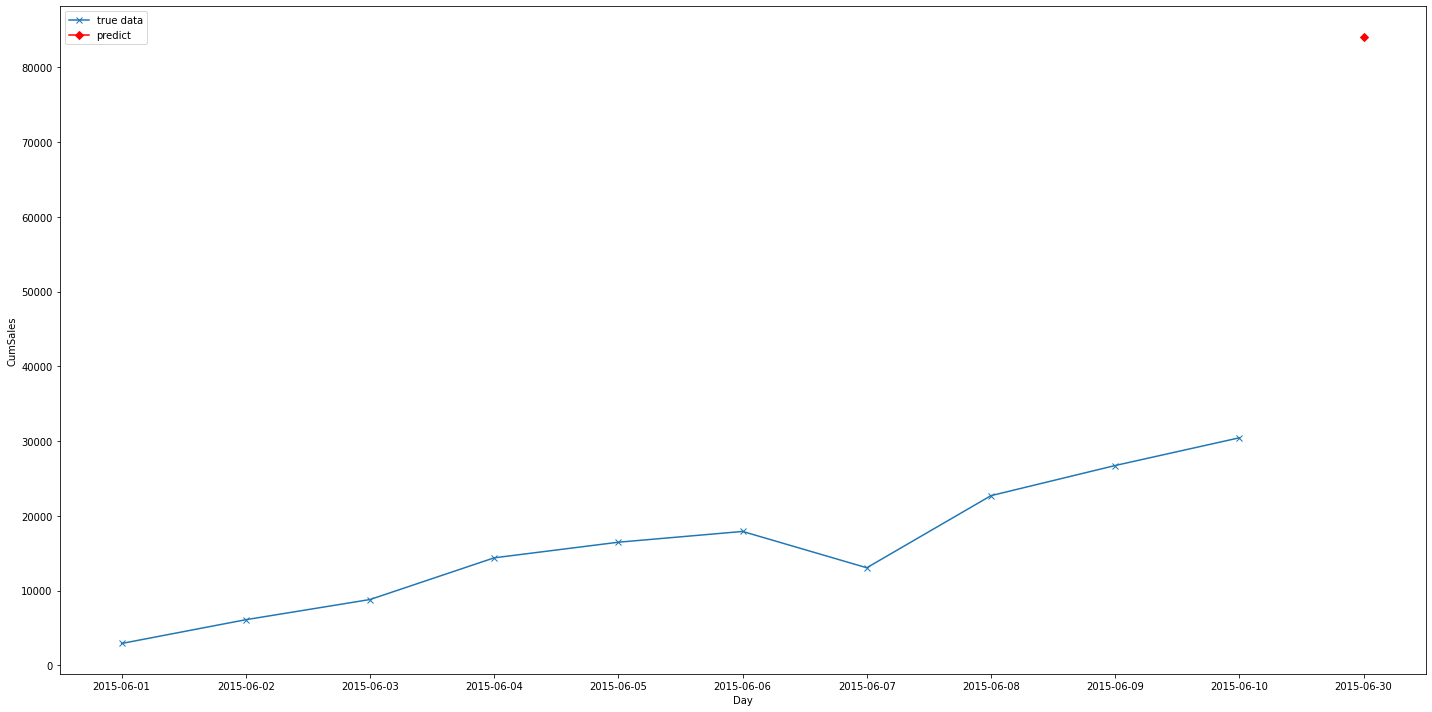

In [268]:
plt.figure(figsize=(20,10))
inverse_d_new(info)
plt.plot(info[1977:1987,0],info[1977:1987,1],marker='x',label='true data')
plt.plot(info[2006,0],pred,marker='D',color='r',label='predict')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()

c:\Users\aumra\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


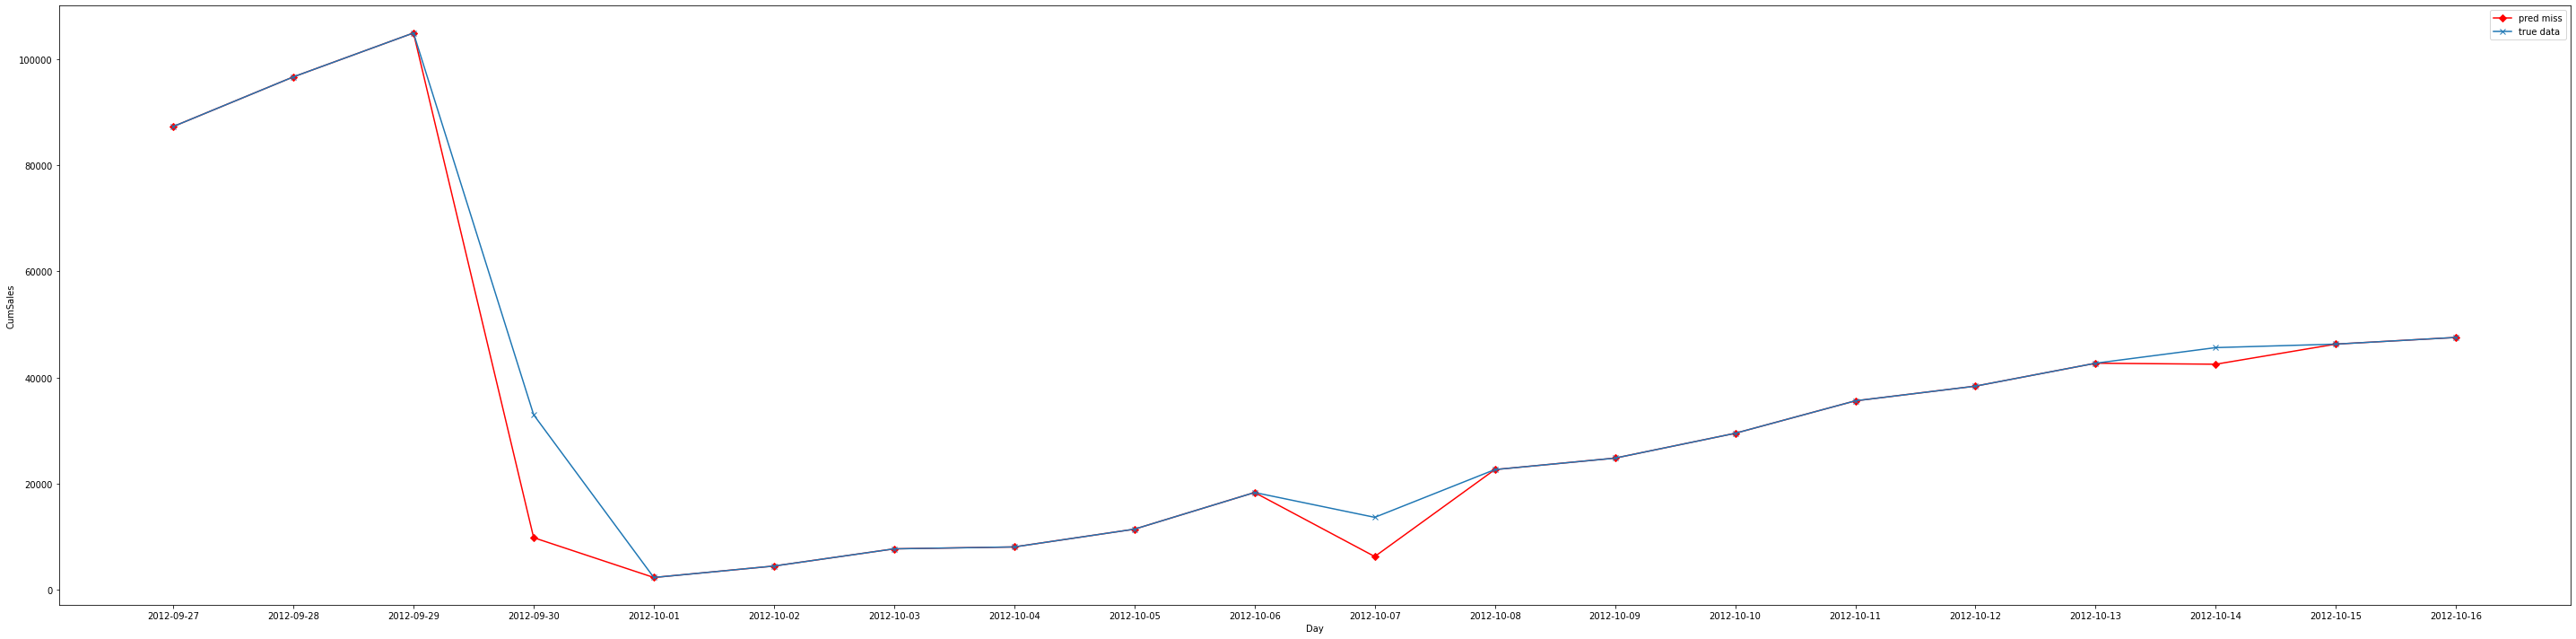

In [270]:
# inverse_d(G732,'G7','A3','C2')
# info = find_value_miss(All_Group[0][0])
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# transform_now(info)
  
# x_train,x_test,y_train,y_test = train_test_split(info[:,0],info[:,1],test_size=0.2,random_state=21)
# reg = LinearRegression()
# reg.fit(x_train.reshape(-1,1),y_train)
# pred=reg.predict([[0]])
# print(pred)
# inverse_d_new(info)
# plt.scatter(info[:5,0],info[:5,1])
# plt.plot(info[0,0],pred,'sr')
# plt.show()

# info
